In [1]:
data(AirPassengers)
AP <- AirPassengers
AP

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

In [2]:
class(AP)

[1] "ts"

In [3]:
start(AP); end(AP); frequency(AP)

[1] 1949    1

[1] 1960   12

[1] 12

In [4]:
summary(AP) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

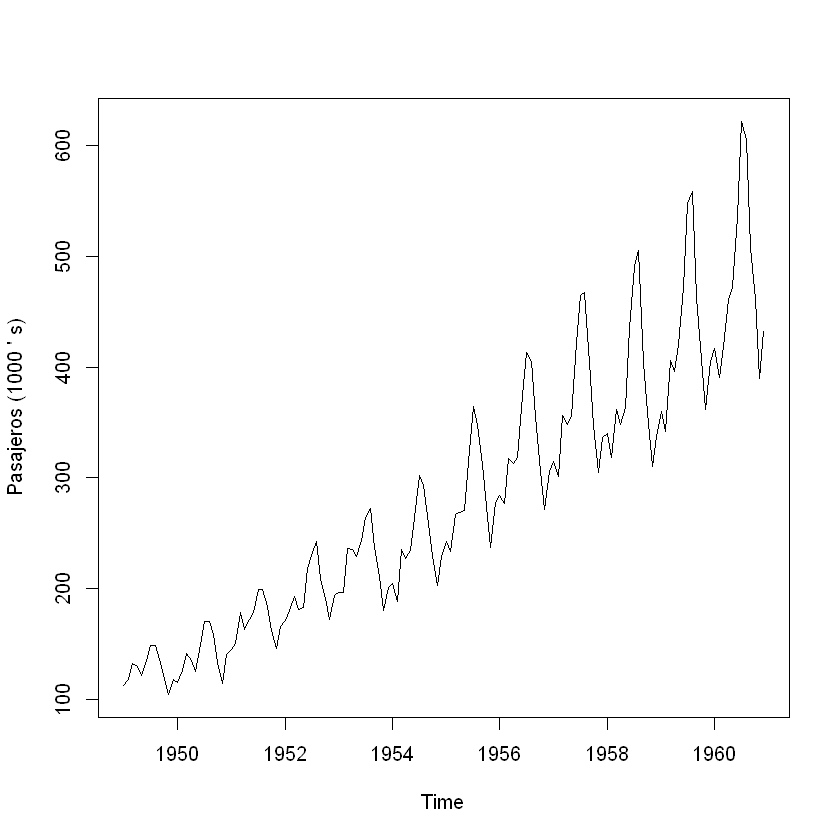

In [7]:
plot(AP, ylab = "Pasajeros (1000 ' s)")

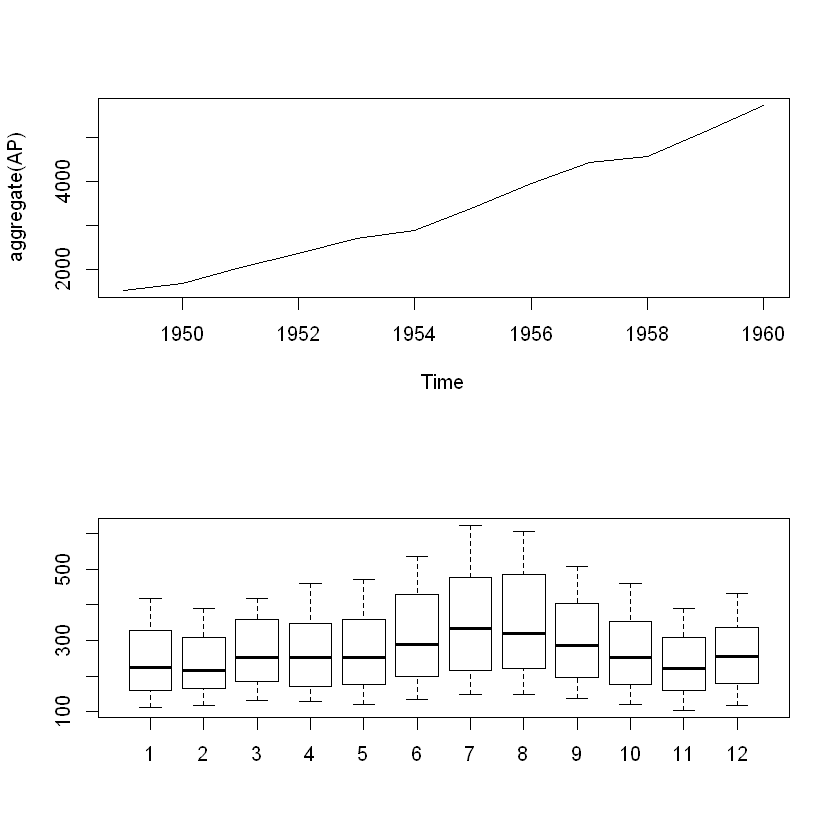

In [8]:
layout(1:2)
plot(aggregate(AP))
boxplot(AP ~ cycle(AP))

In [10]:
www <- "http://www.maths.adelaide.edu.au/andrew.metcalfe/Data/Maine.dat"
Maine.month <- read.table(www, header = TRUE)
class(Maine.month)

[1] "data.frame"

In [15]:
Maine.month.ts <- ts(Maine.month$unemploy, start = c(1996, 1), freq = 12)

In [16]:
Maine.annual.ts <- aggregate(Maine.month.ts)/12

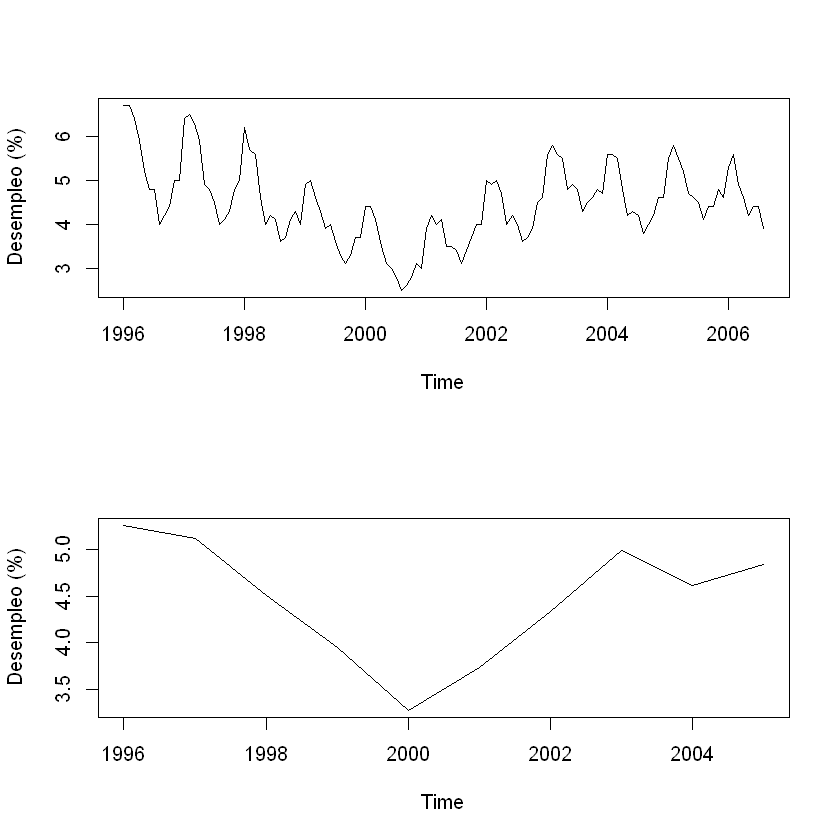

In [19]:
layout(1:2)
plot.ts(Maine.month.ts, ylab = "Desempleo (%)")
plot(Maine.annual.ts, ylab = "Desempleo (%)")

In [18]:
Maine.Feb <- window(Maine.month.ts, start = c(1996,2), freq = TRUE)
Maine.Aug <- window(Maine.month.ts, start = c(1996,8), freq = TRUE)
Feb.ratio <- mean(Maine.Feb) / mean(Maine.month.ts)
Aug.ratio <- mean(Maine.Aug) / mean(Maine.month.ts)
Feb.ratio
Aug.ratio

[1] 1.222529

[1] 0.8163732

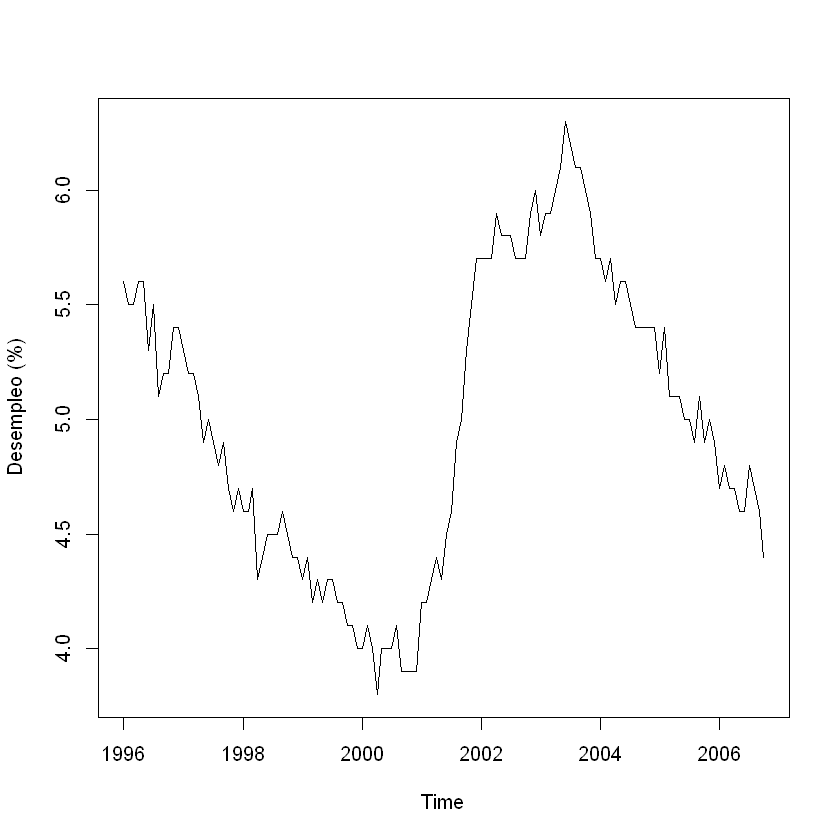

In [20]:
www <- "http://www.maths.adelaide.edu.au/andrew.metcalfe/Data/USunemp.dat"
US.month <- read.table(www, header = T)
attach(US.month)
US.month.ts <- ts(USun, start=c(1996,1), end=c(2006,10), freq = 12)
plot(US.month.ts, ylab = "Desempleo (%)")

In [22]:
www <- "http://www.maths.adelaide.edu.au/andrew.metcalfe/Data/cbe.dat"
CBE <- read.table(www, header = T)
head(CBE)

choc,beer,elec
1451,96.3,1497
2037,84.4,1463
2477,91.2,1648
2785,81.9,1595
2994,80.5,1777
2681,70.4,1824


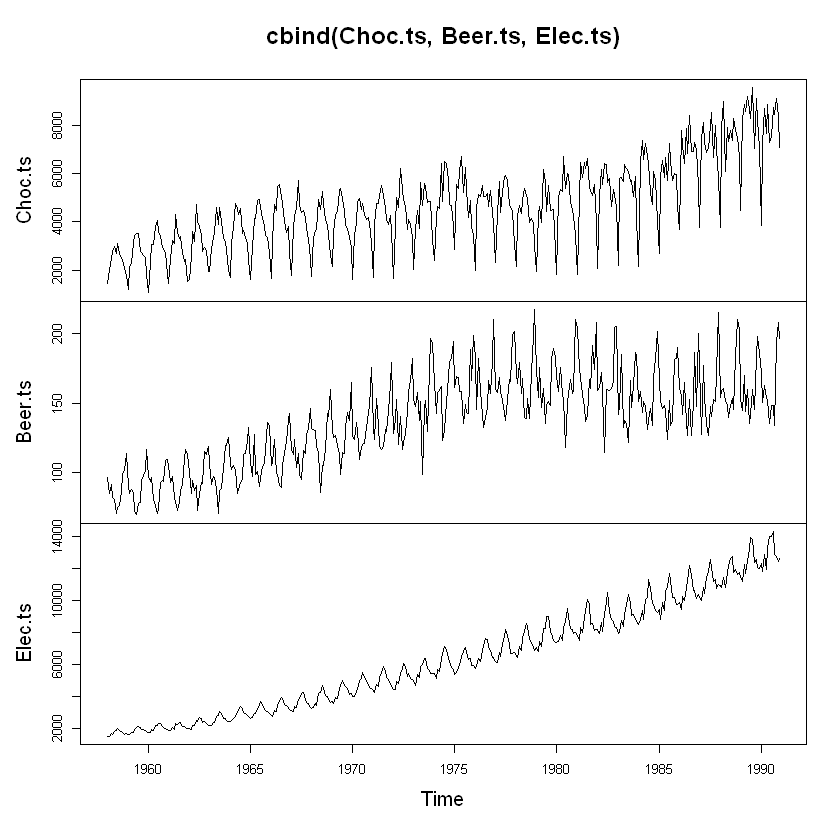

In [23]:
Choc.ts <- ts(CBE[, 1], start = 1958, freq = 12)
Beer.ts <- ts(CBE[, 2], start = 1958, freq = 12)
Elec.ts <- ts(CBE[, 3], start = 1958, freq = 12)

plot(cbind(Choc.ts, Beer.ts, Elec.ts))

In [25]:
 AP.elec <- ts.intersect(AP, Elec.ts)
AP.elec

AP,Elec.ts
340,1497
318,1463
362,1648
348,1595
363,1777
435,1824
491,1994
505,1835
404,1787
359,1699


In [26]:
start(AP.elec)
end(AP.elec)
AP.elec[1:3, ]

[1] 1958    1

[1] 1960   12

AP,Elec.ts
340,1497
318,1463
362,1648


[1] 0.8841668

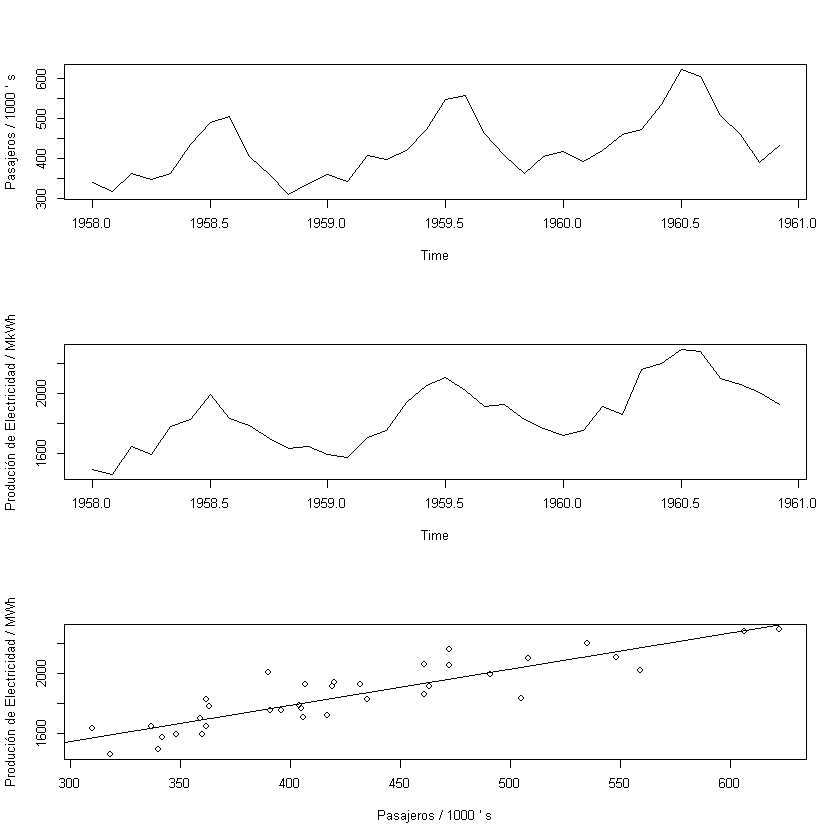

In [29]:
AP <- AP.elec[,1]; Elec <- AP.elec[,2]
layout(1:3)
plot(AP, main = "", ylab = "Pasajeros / 1000 ' s")
plot(Elec, main = "", ylab = "Produción de Electricidad / MkWh")
plot(as.vector(AP), as.vector(Elec),
xlab = "Pasajeros / 1000 ' s",
ylab = "Produción de Electricidad / MWh")
abline(reg = lm(Elec ~ AP))
cor(AP, Elec)

[1] 2.9243 2.9422 3.1719 3.2542

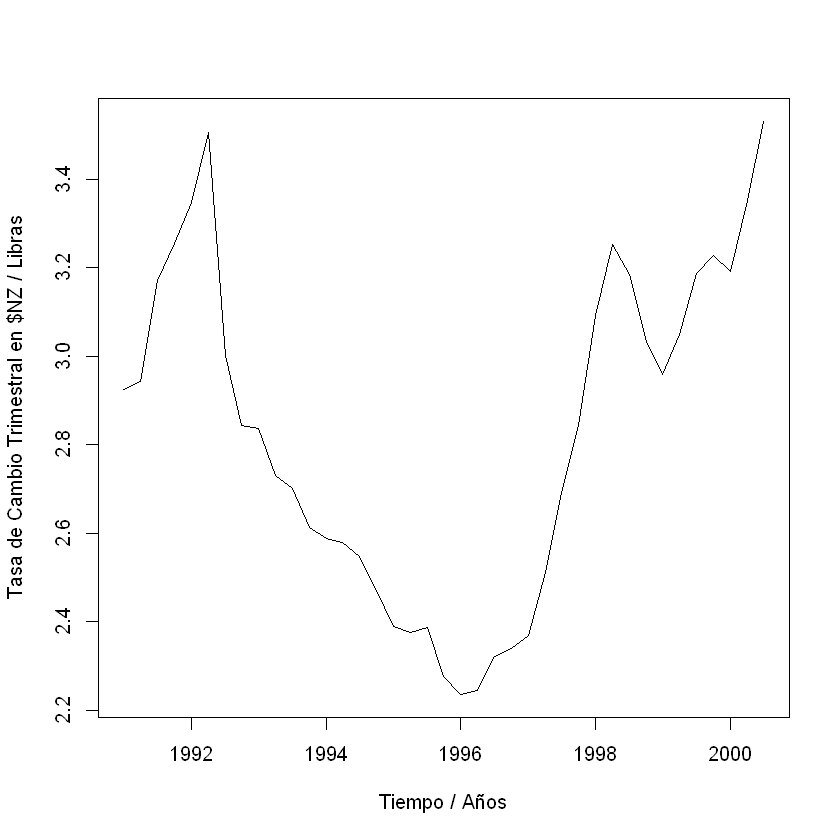

In [31]:
www <- "http://www.maths.adelaide.edu.au/andrew.metcalfe/Data/pounds_nz.dat"
Z <- read.table(www, header = T)
Z[1:4, ]
Z.ts <- ts(Z, st = 1991, fr = 4)
plot(Z.ts, xlab = "Tiempo / Años",
ylab = "Tasa de Cambio Trimestral en $NZ / Libras")

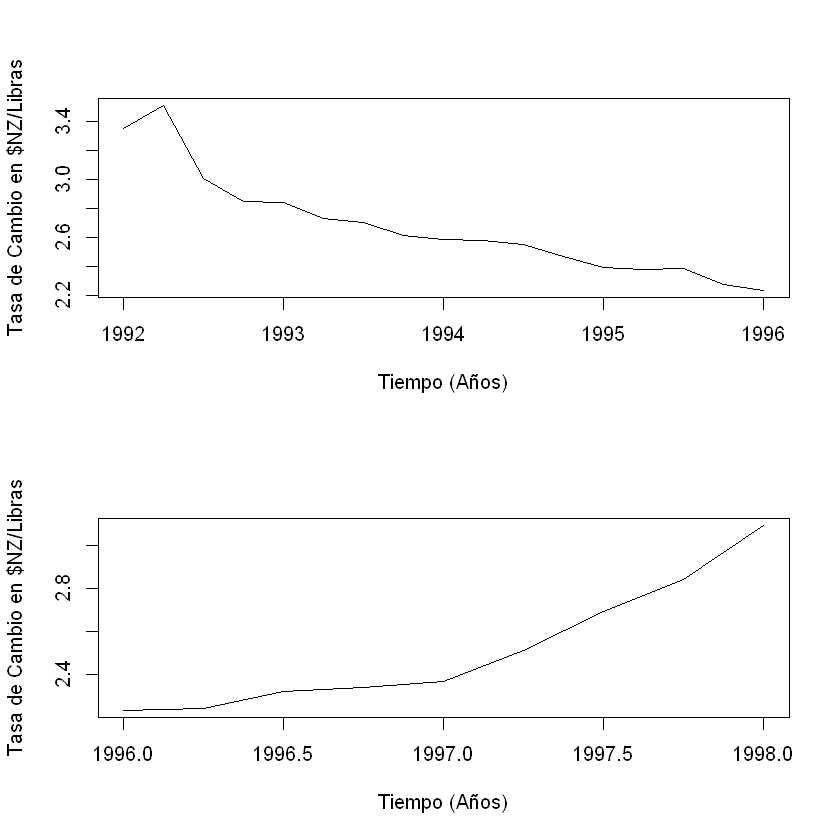

In [32]:
Z.92.96 <- window(Z.ts, start = c(1992, 1), end = c(1996, 1))
Z.96.98 <- window(Z.ts, start = c(1996, 1), end = c(1998, 1))
layout (1:2)
plot(Z.92.96, ylab = "Tasa de Cambio en $NZ/Libras",
xlab = "Tiempo (Años)" )
plot(Z.96.98, ylab = "Tasa de Cambio en $NZ/Libras",
xlab = "Tiempo (Años)" )

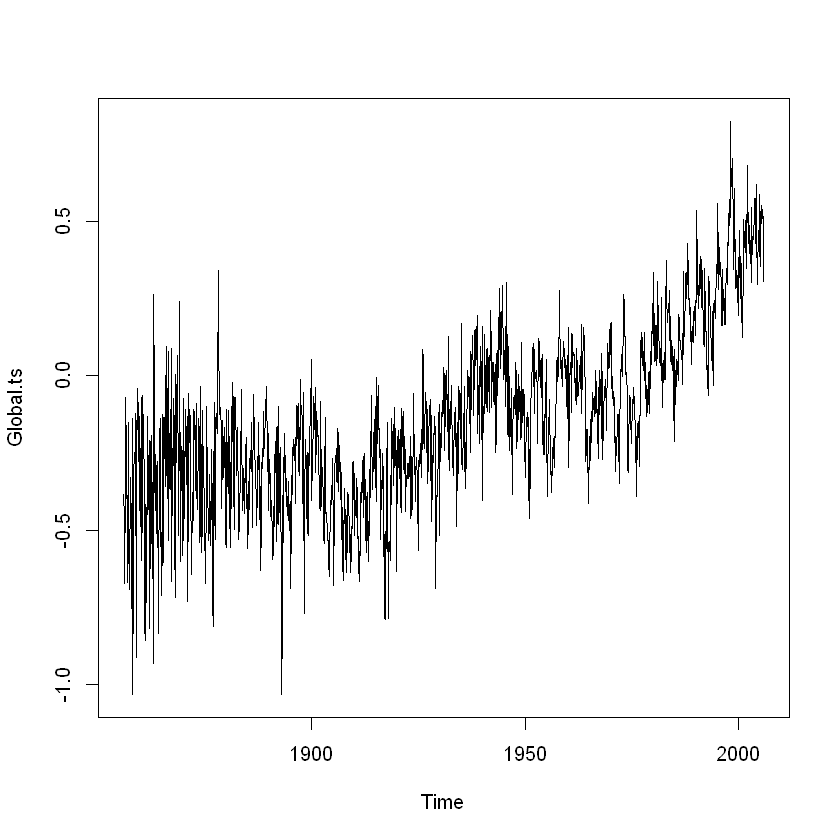

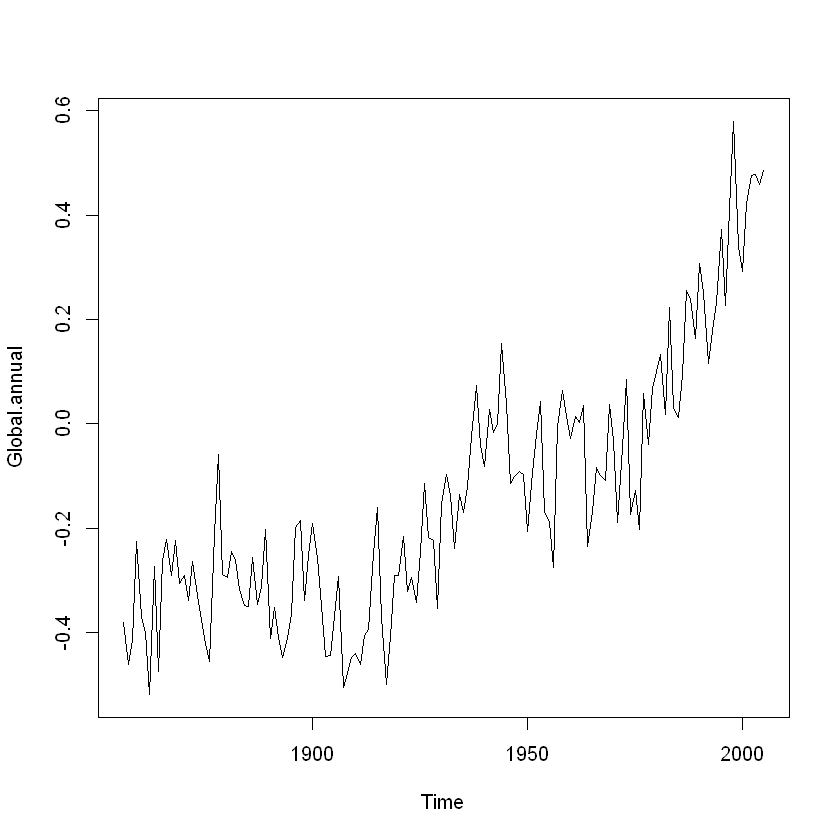

In [33]:
www <- "http://www.maths.adelaide.edu.au/andrew.metcalfe/Data/global.dat"
Global <- scan(www)
Global.ts <- ts(Global, st = c(1856, 1), end = c(2005, 12),
fr = 12)
Global.annual <- aggregate(Global.ts, FUN = mean)
plot(Global.ts)
plot(Global.annual)

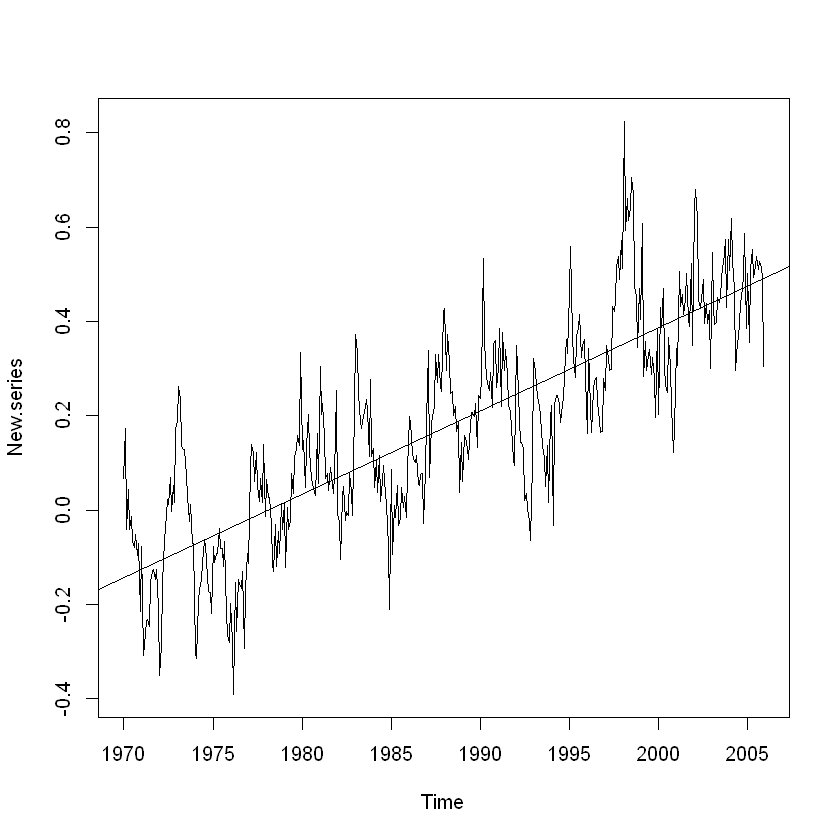

In [34]:
New.series <- window(Global.ts, start=c(1970, 1), end=c(2005, 12))
New.time <- time(New.series)
plot(New.series); abline(reg=lm(New.series ~ New.time))

In [ ]:
plot(decompose(Elec.ts))
Elec.decom <- decompose(Elec.ts, type = "mult")
plot(Elec.decom)
Trend <- Elec.decom$trend
Seasonal <- Elec.decom$seasonal
ts.plot(cbind(Trend, Trend * Seasonal), lty = 1:2)